In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [2]:
# Data collection and processing

# loading the csv data to a Panda dataframe
gold_data= pd.read_csv('gld_price_data.csv')

In [3]:
# print first 5 rows of dataframe

gold_data.head()

,Date,SPX,Glod,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# pint the last 5 rows of dataframe

gold_data.tail()

,Date,SPX,Glod,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of the roes and columns

gold_data.shape

(2290, 6)

In [7]:
# getting some basic information of the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   Glod     2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values

gold_data.isnull().sum()
# no missing value

Date       0
SPX        0
Glod       0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting statictical measures of the data
gold_data.describe()

,SPX,Glod,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
# Correlation between the columns in the dataset
# 1. Positive Correlation: Directly proportional
# 2. Negative Correlation: Inversely proportional

In [12]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

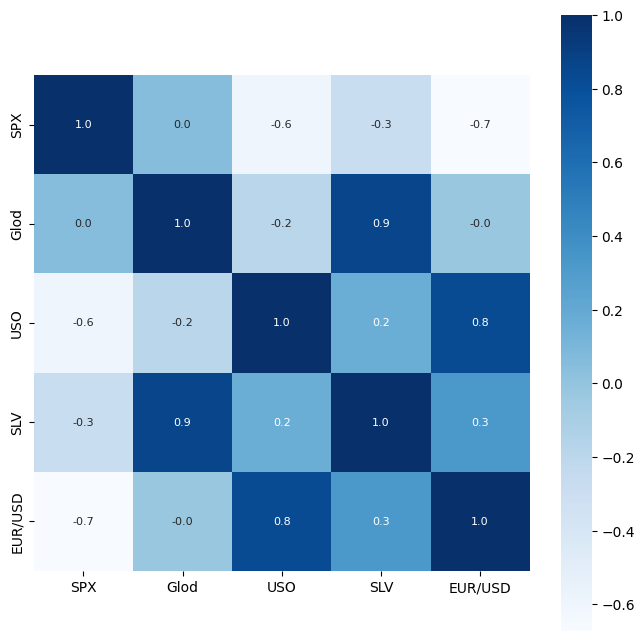

In [15]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
# correlation values of Glod

print(correlation['Glod'])

SPX        0.049345
Glod       1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: Glod, dtype: float64


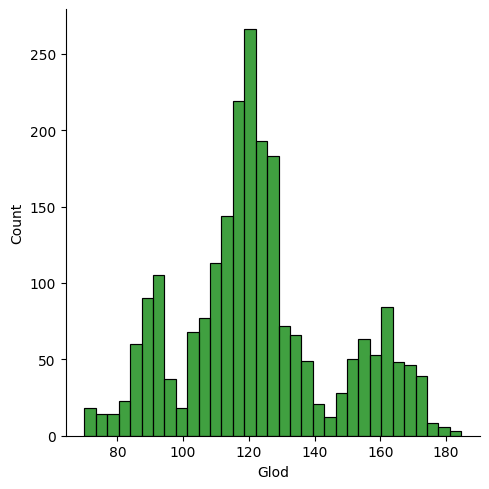

In [17]:
# check the disttribution of the gold price

sns.displot(gold_data['Glod'], color= 'green')

In [19]:
# remove date column and also separate the 'Glod' column form the dataset

# Splitting the features and the target

x= gold_data.drop(['Date','Glod'], axis=1) 
#  (for dropping a column, axis =1 and row, axis=0)

y= gold_data['Glod']

print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: Glod, Length: 2290, dtype: float64


In [21]:
# Splitting into training and test data

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size =0.2, random_state=2)


In [22]:
# Model Training: Random Forest Regressor

# Random Forest-
# A non simple model: contains of more than one model 
# - It contains decision tree, nodes and branches
# - multiple decision trees and on the basis of voting system, 
# result is generated: majority value or averaging the values from the decision trees


regressor= RandomForestRegressor(n_estimators=100)

In [23]:
# Train the model

regressor.fit(x_train, y_train)

RandomForestRegressor()

In [24]:
# Model Evaluation

# Prediction on test data

test_data_prediction= regressor.predict(x_test)

In [25]:
print(test_data_prediction)

[168.56569962  81.86379989 115.91810094 127.58330064 120.70470134
 154.52029739 150.28149851 126.14570044 117.56969867 126.11340047
 116.85650083 172.37160093 141.78109868 167.9901988  115.13790009
 117.40850037 138.86900299 170.2301011  158.13160315 161.77769938
 155.14890006 125.3697     175.95939981 157.20730288 125.26210041
  93.62739959  77.17890032 120.40890006 119.04809932 167.51929944
  88.16610077 124.92579982  91.05070051 117.66170021 121.13829906
 136.51250145 115.53730138 115.19100071 148.23219942 107.07970112
 104.17420254  87.28019794 126.44640059 117.96749962 154.03749923
 119.60319981 108.44209997 108.0545984   93.15820025 127.18649714
  74.46530033 113.74649911 121.20420027 111.34159891 119.06119943
 120.51589918 159.30759984 169.421201   146.97149655  85.89339909
  94.29080031  86.75039881  90.69040034 119.04300062 126.45310075
 127.5487999  168.51959946 122.22179908 117.62589864  98.47530018
 168.43850131 143.2802984  132.536902   121.19200202 121.14299949
 119.81540

In [27]:
# R squared error to compare the prediction with correct values

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared errror: ", error_score)

R squared errror:  0.989184938942483


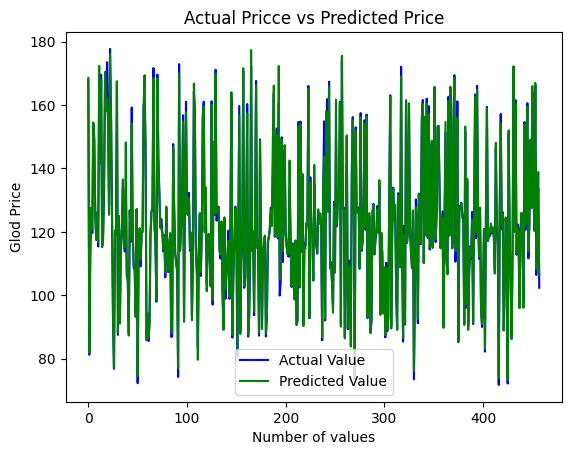

In [30]:
# this error score is really good that model is preforming well, 
# if in range 1 or 2, then problem


# Compare the actual values and the predicted values in a plot


y_test= list(y_test)
# otherwise it might give error while plotting

plt.plot(y_test, color='blue', label= 'Actual Value')
plt.plot(test_data_prediction, color='green', label= 'Predicted Value')
plt.title('Actual Pricce vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Glod Price')
plt.legend()
plt.show()